<a href="https://colab.research.google.com/github/armandossrecife/my_validation3/blob/main/analise_issues_cassandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Piloto 1 - Análise dos issues do Cassandra

3a. Rodada (pós reunião)

**Cenário1:** Issues que aparecem nos commits com classes críticas

Período: from 2/03/2009 to 4/10/2023

Commits: 29230

Issues: 18635

Repositório Apache Cassandra: https://github.com/apache/cassandra

Issue Tracker: https://issues.apache.org/jira/projects/CASSANDRA

# Processo de coleta, análise e interpretação dos resultados


**1.   Coleta dos dados**

Definição da nossa população de interesse

- população de commits: os commits do repositório "Apache Cassandra" no GitHub entre as datas especificadas que possuam classes críticas.
- população de issues: os issues do Issue Tracker do "Apache Cassandra" entre as datas especificadas que estão relacionados aos commits com classes críticas

**2.   Seleção da amostra**

Seleção de uma parte dos issues suspeitos que serão analisados.

- uma amostra aleatória de issues em vez de toda a população de issues, devido a necessidade de realizar inspeção manual nos issues e esta tarefa "consome muito tempo".
- Tempo médio de inspeção manual de issues: 40 issues por dia.

**3.   Cálculo da amostra**

Baseado em uma variável aleatória contínua normal do [ScyPY](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

- Baseado nos parâmetros: confidence_level = 0.95, margin_of_error = 0.05, population_proportion = 0.5 e population_size = len(quantidade_de_issues_suspeitos)
- sample_size = calculate_sample_size(confidence_level, margin_of_error, population_proportion, population_size)
- norm.ppf(): variável aleatória contínua normal

**4. Análise estatística**

Após a coleta de dados, vamos realizar as análises estatísticas dos issues para checar se os issues suspeitos indicam impacto arquitetural.


**5. Visualização dos dados**

Vamos criar os gráficos e visualizações sobre os issues suspeitos

**6. Interpretação dos resultados**

Vamos interpretar os resultados das análises estatísticas e tirar nossas conclusões sobre os issues suspeitos.

## Perguntas

Primeira parte:

Q1. Quais são as classes críticas?

Q2. Quais são os commits que possuem classes críticas?

Q3. Quais são os issues que aparecem nos commits que possuem classes críticas?

Segunda parte:

Q4. Os issues da Q3 possuem impacto arquitetural?

Q5. Quanto (%) dos issues da Q3 possuem impacto arquitetural?

### Importa o dataset inicial

In [ ]:
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/commits_arquivos_criticos.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/issues_in_commits_arquivos_criticos.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/cenario1_issues_inspected.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/cenario1_commits_crical_classes_and_issues.xlsx

--2023-11-01 21:11:36--  https://raw.githubusercontent.com/armandossrecife/my_validation2/main/commits_arquivos_criticos.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13233731 (13M) [application/octet-stream]
Saving to: ‘commits_arquivos_criticos.xlsx.1’

commits_arquivos_cr 100%[===================>]  12.62M  --.-KB/s    in 0.05s   

2023-11-01 21:11:36 (233 MB/s) - ‘commits_arquivos_criticos.xlsx.1’ saved [13233731/13233731]

--2023-11-01 21:11:36--  https://raw.githubusercontent.com/armandossrecife/my_validation2/main/issues_in_commits_arquivos_criticos.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_commits_classes_criticas = pd.read_excel('commits_arquivos_criticos.xlsx')
df_issues_in_commits_classes_criticas = pd.read_excel('issues_in_commits_arquivos_criticos.xlsx')
df_issues_cenario1 = pd.read_excel('cenario1_issues_inspected.xlsx')
df_commits_cenario1 = pd.read_excel('cenario1_commits_crical_classes_and_issues.xlsx')

def show_pie(my_df, my_field, my_title):
  type_counts = my_df[my_field].value_counts().sort_values(ascending=False)
  type_percentages = type_counts / type_counts.sum() * 100

  plt.pie(type_percentages, labels=type_counts.index, autopct="%.1f%%")
  plt.title(my_title)
  plt.show()
  print(f'Total: {type_counts[0] + type_counts[1]} - Yes: {type_counts[1]}, No: {type_counts[0]}')

# Primeira Parte

## Q1. Classes críticas

From [ATDCodeAnalyzer](https://github.com/mining-software-repositories/cassandra)

São classes impactadas por ATD identificadas pelo ATDCodeAnalyzer

In [ ]:
lista_classes_criticas = ['StorageService.java', 'ColumnFamilyStore.java', 'DatabaseDescriptor.java', 'CompactionManager.java', 'StorageProxy.java', 'SSTableReader.java', 'Config.java', 'CassandraDaemon.java', 'SelectStatement.java', 'SinglePartitionReadCommand.java', 'NodeProbe.java', 'MessagingService.java']
print(len(lista_classes_criticas), lista_classes_criticas)

12 ['StorageService.java', 'ColumnFamilyStore.java', 'DatabaseDescriptor.java', 'CompactionManager.java', 'StorageProxy.java', 'SSTableReader.java', 'Config.java', 'CassandraDaemon.java', 'SelectStatement.java', 'SinglePartitionReadCommand.java', 'NodeProbe.java', 'MessagingService.java']


## Q2. Commits com classes críticas

From [My_validation](https://www.github.com/armandossrecife/my_validation)

São os commits que possuem pelo menos uma classe crítica em seu registro, ou seja, se um commit modificar classes críticas, ele será relevante para a nossa análise.

**4522** commits

In [ ]:
df_commits_classes_criticas

,hahs,msg,m_files,date,lines,files,diff_files,diff_modified_files
0,1f91e99223b0d1b7ed8390400d4a06ac08e4aa85,git-svn-id: https://svn.apache.org/repos/asf/i...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",2/3/2009,74502,344,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""Binary files /dev/null and b/lib/JSAP-..."
1,cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,Add build script and make sure it works\n\ngit...,['StorageService.java'],2/3/2009,156,4,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -0,0 +1,133 @@\n+<?xml version=\""1...."
2,5bea7e1772e9fd042b10abebb1e0c78579942b26,Removed references to JDK7 specific things.\n\...,['ColumnFamilyStore.java'],20/3/2009,82,2,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -20,7 +20,6 @@ package org.apache.c..."
3,f4f3ca50d84e165a909dca5608babb32df199f44,rename serializer2 -> serializerWithIndexers\n...,['ColumnFamilyStore.java'],27/3/2009,26,4,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -70,7 +70,7 @@ public final class C..."
4,39d3f833f9c4e154eb157336f5e7b2a1ce9a79a3,add SuperColumn support to forceFlush. split ...,['ColumnFamilyStore.java'],27/3/2009,89,5,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -395,11 +395,11 @@ public class Col..."
...,...,...,...,...,...,...,...,...
4517,6708499e4c930f7733894e6076b925fb151d9251,Remove metrics-reporter-config dependency\n\np...,['CassandraDaemon.java'],12/9/2023,105,10,"[\n {\n ""CassandraDaemon.java"": ""@@ ...","[\n ""@@ -43,7 +43,6 @@\n <..."
4518,20d80118ac02d853d501e3f5c24a63a12d4010f5,Add the ability to disable bulk loading of SST...,['Config.java'],19/9/2023,289,11,"[\n {\n ""Config.java"": ""@@ -860,6 +8...","[\n ""@@ -1,4 +1,5 @@\n 5.1\n+ * Add the abi..."
4519,d16e8d3653dce8ed767a040c06dbaabc47a9b474,Do not create sstable files before registering...,['CompactionManager.java'],25/9/2023,724,18,"[\n {\n ""CompactionManager.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 5.0-alpha2\n+ * Do n..."
4520,b9586501a6b6cdfe465302448018785652c9b966,Internode legacy SSL storage port certificate ...,['MessagingService.java'],25/9/2023,237,13,"[\n {\n ""MessagingService.java"": ""@@...","[\n ""@@ -1,4 +1,5 @@\n 4.1.4\n+ * Internode..."


## Q3. Issues que aparecem nos commits com classes críticas

From [My_validation](https://www.github.com/armandossrecife/my_validation)

Existem referências a issues relacionadas aos commits com classes críticas.

A seleção desses issues foi feita analisando as mensagens dos commit e procurando por IDs de issues registrados nas mensagens dos commits com classes críticas.

Os issues "suspeitos" de são issues que podem ter impacto arquitetural no projeto

**2912** issues suspeitos

In [ ]:
df_issues_in_commits_classes_criticas

,issue_key,summary,issue_type,issue_status,issue_priority,description,comments
0,CASSANDRA-261,get_slice needs offset + limit,Bug,Resolved,Normal,Right now get_slice does not allow you to prov...,"['Me, explaining new get_slice: so now you wou..."
1,CASSANDRA-259,LRU cache for key positions,New Feature,Resolved,Normal,"add cache like the old touch cache, but workin...","[""LinkedHashMap is a nonstarter though. This ..."
2,CASSANDRA-254,clean up sstable constructors,Improvement,Resolved,Normal,NaN,"['+1', 'committed', ""Integrated in Cassandra #..."
3,CASSANDRA-251,Restore ColumnSort=Time on Super Columnfamilies,Improvement,Resolved,Normal,Setting ColumnSort=Time on a Super Columnfamil...,"['Sorry, I got a little rattled by the ""oh cra..."
4,CASSANDRA-248,Replace factory method based on explicit locks...,Improvement,Resolved,Normal,Replace factory method based on explicit locks...,"['Patch submitted.', 'This is double-checked l..."
...,...,...,...,...,...,...,...
2907,CASSANDRA-18504,"Added support for type VECTOR<type, dimension>",Improvement,Resolved,Normal,"Based off several mailing list threads (see ""[...",['having a hard time fixing CQL3TypeLiteralTes...
2908,CASSANDRA-18500,Add guardrail for partition size,New Feature,Resolved,Normal,"Add a guardrail for max partition size, for ex...","[""The proposed patch adds a new guardrail for ..."
2909,CASSANDRA-18816,Add support for repair coordinator to retry me...,Improvement,Resolved,Normal,"Now that CASSANDRA-15399 is in, most of the re...",['scope slightly increased due to bugs found b...
2910,CASSANDRA-18803,Refactor validation logic in StorageService.re...,Bug,Resolved,Normal,This is a follow-up ticket of CASSANDRA-14319,['[~aweisberg] would you mind to take a look? ...


# Segunda Parte

## Seleção da amostra de issues

Foi feita uma amostra aleatória, baseada em uma variável aleatória normal, dos issues referenciados nos commits com classes críticas. Com isso, esta amostra funcionará como base para a análise do comportamento dos issues.

População de issues suspeitos: **2912**

Amostra: **226**

## Q4. Os issues da Q3 possuem impacto arquitetural?

De acordo com as análises da amostra deste cenário, sim, estes issues possem impacto arquitetural, mas é em menor percentual do que os issues que não possuem.

**226** issues foram inspecionadas

### Relação de issues inspecionados

In [ ]:
df_issues_cenario1

,issue_key,summary,issue_type,issue_status,issue_priority,description,comments,architectural_impact
0,CASSANDRA-235,Move system CFs into own Table,Sub-task,Resolved,Normal,NaN,"[""commit message for 04 reads\n\n DBManager...",YES
1,CASSANDRA-212,Range queries do not yet span multiple nodes,Bug,Resolved,Normal,Need ability to continue a query on the next n...,"[""All this needs is a bool added to RangeReply...",YES
2,CASSANDRA-173,add getPendingTasks to CFSMBean,Improvement,Resolved,Low,need to add an atomicint and inc/decr it whene...,['rebased patch as 0001-CASSANDRA-173-added-CF...,NO
3,CASSANDRA-124,NullPointerException in consistency manager af...,Bug,Resolved,Urgent,ERROR [CONSISTENCY-MANAGER:2] 2009-04-30 18:22...,"[""Shouldn't ConsistencyManager() constructor c...",NO
4,CASSANDRA-78,Interrupted recovery requires manual intervent...,Bug,Resolved,Urgent,"Originally reported by Alexander Staubo: ""If y...","[""Prashant's memory seems to be wrong here -- ...",NO
...,...,...,...,...,...,...,...,...
221,CASSANDRA-18153,Memtable being flushed without hostId in versi...,Bug,Resolved,Normal,On ticket CASSANDRA-16619 some files were chan...,"['CC [~jlewandowski]\xa0', 'Storage service is...",YES
222,CASSANDRA-18697,Skip ColumnFamilyStore#topPartitions initializ...,Bug,Resolved,Normal,In {{org.apache.cassandra.db.ColumnFamilyStore...,['CI: [https://app.circleci.com/pipelines/gith...,NO
223,CASSANDRA-18681,Internode legacy SSL storage port certificate ...,Bug,Resolved,Normal,In CASSANDRA-16666 the SSLContext cache was ch...,['4.1 [Branch|https://github.com/jonmeredith/c...,YES
224,CASSANDRA-18617,Disable the deprecated keyspace/table threshol...,Improvement,Resolved,Normal,The non-guardrail thresholds 'keyspace_count_w...,"[""Part of this change is to add converters tha...",YES


## Q5. Quanto (%) dos issues da Q3 possuem impacto arquitetural?

**42,5%** *dos issues possuem impacto arquitetural*

57,5% não possuem impacto arquitetural

Obs: os resultados e justificativas das inspeções estão no my_inspection.zip


Impacto arquitetural nos Issues


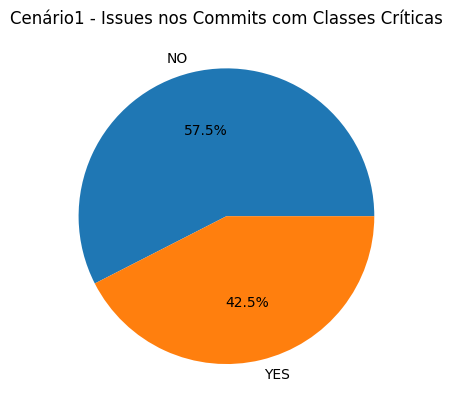

Total: 226 - Yes: 96, No: 130


In [ ]:
print('Impacto arquitetural nos Issues')
show_pie(my_df=df_issues_cenario1, my_field='architectural_impact', my_title='Cenário1 - Issues nos Commits com Classes Críticas')

### Issues com impacto arquitetural

**96** issues

In [ ]:
df_issues_cenario1[df_issues_cenario1.architectural_impact == 'YES']

,issue_key,summary,issue_type,issue_status,issue_priority,description,comments,architectural_impact
0,CASSANDRA-235,Move system CFs into own Table,Sub-task,Resolved,Normal,NaN,"[""commit message for 04 reads\n\n DBManager...",YES
1,CASSANDRA-212,Range queries do not yet span multiple nodes,Bug,Resolved,Normal,Need ability to continue a query on the next n...,"[""All this needs is a bool added to RangeReply...",YES
5,CASSANDRA-71,Range query support,New Feature,Resolved,Normal,Scan for keys by range (between X and Y) or pr...,"['Add range query support, which requires usin...",YES
7,CASSANDRA-512,regression prevents recognizing local reads,Bug,Resolved,Normal,NaN,"['+1', 'committed', 'Integrated in Cassandra #...",YES
9,CASSANDRA-414,remove sstableLock,Improvement,Resolved,Normal,NaN,['rebased.\n\n02\n remove sstableLock. re-...,YES
...,...,...,...,...,...,...,...,...
218,CASSANDRA-18430,When decommissioning should set Severity to li...,Improvement,Resolved,Normal,When we are decommissioning we first set LEAVI...,['Can you rebase this to more relevant commits...,YES
219,CASSANDRA-18320,Incompatible file system thrown while running ...,Bug,Resolved,Normal,{code}\r\njava.io.UncheckedIOException\r\n\tat...,['It says that it can not recursively remove a...,YES
221,CASSANDRA-18153,Memtable being flushed without hostId in versi...,Bug,Resolved,Normal,On ticket CASSANDRA-16619 some files were chan...,"['CC [~jlewandowski]\xa0', 'Storage service is...",YES
223,CASSANDRA-18681,Internode legacy SSL storage port certificate ...,Bug,Resolved,Normal,In CASSANDRA-16666 the SSLContext cache was ch...,['4.1 [Branch|https://github.com/jonmeredith/c...,YES


### Issues sem impacto arquitetural

**130** issues

In [ ]:
df_issues_cenario1[df_issues_cenario1.architectural_impact == 'NO']

,issue_key,summary,issue_type,issue_status,issue_priority,description,comments,architectural_impact
2,CASSANDRA-173,add getPendingTasks to CFSMBean,Improvement,Resolved,Low,need to add an atomicint and inc/decr it whene...,['rebased patch as 0001-CASSANDRA-173-added-CF...,NO
3,CASSANDRA-124,NullPointerException in consistency manager af...,Bug,Resolved,Urgent,ERROR [CONSISTENCY-MANAGER:2] 2009-04-30 18:22...,"[""Shouldn't ConsistencyManager() constructor c...",NO
4,CASSANDRA-78,Interrupted recovery requires manual intervent...,Bug,Resolved,Urgent,"Originally reported by Alexander Staubo: ""If y...","[""Prashant's memory seems to be wrong here -- ...",NO
6,CASSANDRA-34,Hinted handoff rows never get deleted,Bug,Resolved,Normal,"from the list: ""after the hints are delivered,...",['Sending out hinted data needs correct RowMut...,NO
8,CASSANDRA-447,Ability to temporary set minimum and maximum c...,New Feature,Resolved,Normal,We need the ability to temporary set minimum a...,['Added the ability set/get max/min compaction...,NO
...,...,...,...,...,...,...,...,...
215,CASSANDRA-17904,Consider to not warn about deprecated properti...,Improvement,Resolved,Low,When there is an initialisation of database de...,['Kindly pinging [~e.dimitrova] to raise aware...,NO
217,CASSANDRA-17868,"Allow disabling hotness persistence, or tuning...",Improvement,Resolved,Normal,The persisting of the sstables hotness when th...,['||Item|Link||\r\n|PR|[link|https://github.co...,NO
220,CASSANDRA-18219,Warning message on aggregation queries doesn't...,Improvement,Resolved,Normal,The existing aggregation query warning message...,['Thank you for reporting this! I will take a ...,NO
222,CASSANDRA-18697,Skip ColumnFamilyStore#topPartitions initializ...,Bug,Resolved,Normal,In {{org.apache.cassandra.db.ColumnFamilyStore...,['CI: [https://app.circleci.com/pipelines/gith...,NO


### Commits dos issues inspecionados

In [ ]:
df_commits_cenario1

,hahs,lista_issues,msg,m_files,date,lines,files,diff_files,diff_modified_files,architectural_impact,scenario
0,9db8da81b7f269e5a8a7f896b751d482847d7082,CASSANDRA-71,"Add range query support, which requires using ...","['DatabaseDescriptor.java', 'ColumnFamilyStore...",29/4/2009,1456,19,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -114,6 +114,9 @@ service Cassandra ...",YES,1
1,5cdc75d7603d1051c9d78d6ee11dd9cd44056f44,CASSANDRA-235,move Hints cf to SYSTEM_TABLE\npatch by jbelli...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",24/6/2009,189,7,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -25,6 +25,8 @@\n <!-- Tables an...",YES,1
2,682736ee5ebf33ed344abd1c6e04dc408a07bfe6,CASSANDRA-235,r/m recycle cf and undocumented/incomplete Loa...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",24/6/2009,2165,18,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -467,12 +467,8 @@ public class Data...",YES,1
3,81dd8ee5f6e224c550bdf956e0bec3ec2c92cbee,CASSANDRA-235,use normal Table for system metadata\npatch by...,"['DatabaseDescriptor.java', 'StorageService.ja...",24/6/2009,304,8,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -77,7 +77,6 @@\n Keep the ...",YES,1
4,b516ce8176c4ff90f4f1696aba9315941b67f0d0,CASSANDRA-235,DBManager obscures rather than clarifies what ...,"['CassandraDaemon.java', 'StorageService.java']",24/6/2009,158,7,"[\n {\n ""CassandraDaemon.java"": ""@@ ...","[\n ""@@ -107,7 +107,7 @@ public class Callo...",YES,1
...,...,...,...,...,...,...,...,...,...,...,...
253,4c85c6a4030d7d613230cd4b2204c42f941fd552,CASSANDRA-17904,"key_cache_save_period, row_cache_save_period, ...",['Config.java'],19/9/2022,10,3,"[\n {\n ""Config.java"": ""@@ -434,19 +...","[\n ""@@ -1,4 +1,5 @@\n 4.1-alpha2\n+ * We s...",NO,1
254,b8494a82751ae2d31ab0f36412f7eacdcc1c3774,CASSANDRA-18219,Log warning message on aggregation queries wit...,['SelectStatement.java'],7/2/2023,8,2,"[\n {\n ""SelectStatement.java"": ""@@ ...","[\n ""@@ -1,4 +1,5 @@\n 4.0.8\n+ * Log warni...",NO,1
255,b8e21fb80afa6696374292dc99a480fac9788e64,CASSANDRA-14319,Validate the existence of a datacenter in node...,['StorageService.java'],17/5/2023,68,3,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -1,4 +1,5 @@\n 3.0.30\n+ * Validate...",NO,1
256,9c796dfb272daa3ce57a2dc5cbeadd9273e1ac72,CASSANDRA-18697,Skip ColumnFamilyStore#topPartitions initializ...,['ColumnFamilyStore.java'],1/8/2023,98,3,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 4.1.4\n+ * Skip Colu...",NO,1
